In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv(("C:\\Users\\Sneha\\Desktop\\Crime Pridictive Analysis\\data\\crime_preprocessed.csv"),encoding = "Latin 1")
df.head()

,Ã¯Â»Â¿X,Y,CCN,REPORT_DAT,START_DATE,END_DATE,BLOCK,OFFENSE,METHOD,SHIFT,...,BID,XBLOCK,YBLOCK,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID,Year,Month,Hour
0,400588.4650,129470.0424,5131706,2025-02-05 05:00:00+00:00,2005/09/27 07:25:00+00,2005/09/27 07:26:00+00,800 - 899 BLOCK OF XENIA STREET SE,3,0,2,...,NaN,400588.464990,129470.042358,-2.446645,0.474124,860225152,NaN,0.0,-1.293980,-1.057964
1,399950.1386,130512.4788,17194618,2025-06-30 04:00:00+00:00,2017/11/09 20:44:00+00,2017/11/09 22:57:34+00,3200 - 3299 BLOCK OF 4TH STREET SE,3,0,2,...,NaN,399950.138558,130512.478775,-2.146539,0.263062,860234458,NaN,0.0,-0.078429,-1.194984
2,406827.3300,136094.5500,22058767,2025-06-30 04:00:00+00:00,2022/04/28 02:21:00+00,2022/04/28 05:00:00+00,200 - 399 BLOCK OF 56TH STREET NE,3,0,2,...,NaN,406827.330000,136094.550000,-0.540415,2.538867,860503965,NaN,0.0,-0.078429,-1.194984
3,399075.7100,128801.5400,22108667,2025-01-02 05:00:00+00:00,2022/07/30 01:12:00+00,2022/07/30 01:13:00+00,1 - 199 BLOCK OF DARRINGTON STREET SW,3,0,2,...,NaN,399075.710000,128801.540000,-2.639104,-0.026036,860514332,NaN,0.0,-1.597868,-1.057964
4,396953.5100,146888.4100,25102388,2025-07-08 00:50:25+00:00,2025/07/07 11:00:00+00,2025/07/07 16:00:00+00,1500 - 1599 BLOCK OF ROXANNA ROAD NW,7,2,1,...,NaN,396953.510000,146888.410000,2.567569,-0.729977,860517603,NaN,0.0,0.225459,-1.743066


In [3]:
X = df[['LATITUDE', 'LONGITUDE']]


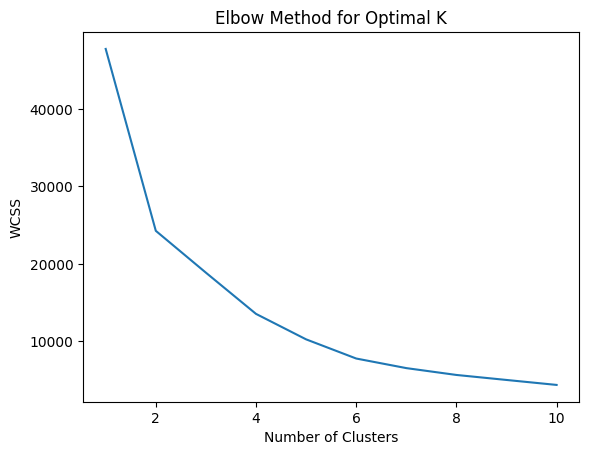

In [4]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

df['KMeans_Cluster'].value_counts()


KMeans_Cluster
1    10417
2     5000
0     4504
3     3951
Name: count, dtype: int64

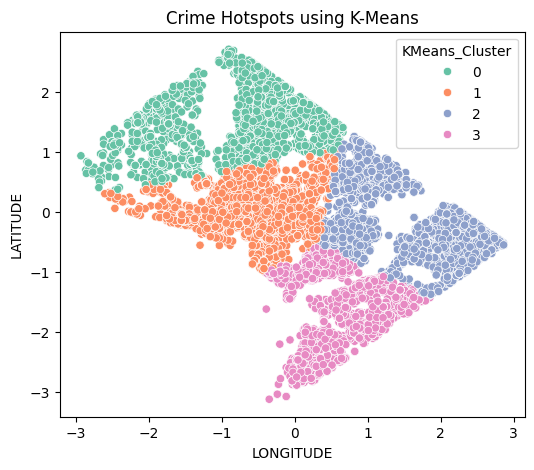

In [6]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=df['LONGITUDE'],
    y=df['LATITUDE'],
    hue=df['KMeans_Cluster'],
    palette='Set2'
)
plt.title("Crime Hotspots using K-Means")
plt.show()


In [7]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['Hierarchical_Cluster'] = hc.fit_predict(X)

df['Hierarchical_Cluster'].value_counts()


Hierarchical_Cluster
1    9802
2    7245
0    4486
3    2339
Name: count, dtype: int64